In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
#from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
#from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split #, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn import preprocessing
from numpy import unravel_index
from matplotlib.colors import ListedColormap
from numpy import linspace
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
# column noames to filter for experiments

LAI = ['LAI_0322', 'LAI_0421', 'LAI_0513', 'LAI_0617', 
       'LAI_0702', 'LAI_0720', 'LAI_0809', 'LAI_0821', 'LAI_0920']

S2 = ['B02_0322', 'B03_0322', 'B04_0322', 'B05_0322',
       'B06_0322', 'B07_0322', 'B08A_0322', 'B08_0322', 'B11_0322', 'B12_0322',
       'B02_0421', 'B03_0421', 'B04_0421', 'B05_0421', 'B06_0421',
       'B07_0421', 'B08A_0421', 'B08_0421', 'B11_0421', 'B12_0421',
       'B02_0513', 'B03_0513', 'B04_0513', 'B05_0513', 'B06_0513', 'B07_0513',
       'B08A_0513', 'B08_0513', 'B11_0513', 'B12_0513', 'B02_0617',
       'B03_0617', 'B04_0617', 'B05_0617', 'B06_0617', 'B07_0617', 'B08A_0617',
       'B08_0617', 'B11_0617', 'B12_0617', 'B02_0702', 'B03_0702',
       'B04_0702', 'B05_0702', 'B06_0702', 'B07_0702', 'B08A_0702', 'B08_0702',
       'B11_0702', 'B12_0702', 'B02_0720', 'B03_0720', 'B04_0720',
       'B05_0720', 'B06_0720', 'B07_0720', 'B08A_0720', 'B08_0720', 'B11_0720',
       'B12_0720', 'B02_0809', 'B03_0809', 'B04_0809', 'B05_0809',
       'B06_0809', 'B07_0809', 'B08A_0809', 'B08_0809', 'B11_0809', 'B12_0809',
       'B02_0821', 'B03_0821', 'B04_0821', 'B05_0821', 'B06_0821',
       'B07_0821', 'B08A.jp_0821', 'B08_0821', 'B11_0821', 'B12_0821',
       'B02_0920', 'B03_0920', 'B04_0920', 'B05_0920', 'B06_0920',
       'B07_0920', 'B08A_0920', 'B08_0920', 'B11_0920', 'B12_0920']

S1 = ['VH_20180303', 'VV_20180303', 'VH_20180311', 'VV_20180311',
       'VH_20180315', 'VV_20180315', 'VH_20180323', 'VV_20180323',
       'VH_20180327', 'VV_20180327', 'VH_20180404', 'VV_20180404',
       'VH_20180408', 'VV_20180408', 'VH_20180416', 'VV_20180416',
       'VH_20180420', 'VV_20180420', 'VH_20180428', 'VV_20180428',
       'VH_20180502', 'VV_20180502', 'VH_20180510', 'VV_20180510',
       'VH_20180522', 'VV_20180522', 'VH_20180526', 'VV_20180526',
       'VH_20180603', 'VV_20180603', 'VH_20180607', 'VV_20180607',
       'VH_20180615', 'VV_20180615', 'VH_20180619', 'VV_20180619',
       'VH_20180627', 'VV_20180627', 'VH_20180701', 'VV_20180701',
       'VH_20180709', 'VV_20180709', 'VH_20180713', 'VV_20180713',
       'VH_20180721', 'VV_20180721', 'VH_20180725', 'VV_20180725',
       'VH_20180802', 'VV_20180802', 'VH_20180806', 'VV_20180806',
       'VH_20180814', 'VV_20180814', 'VH_20180818', 'VV_20180818',
       'VH_20180826', 'VV_20180826', 'VH_20180830', 'VV_20180830',
       'VH_20180907', 'VV_20180907', 'VH_20180911', 'VV_20180911',
       'VH_20180919', 'VV_20180919', 'VH_20180923', 'VV_20180923',
       'VH_20180305', 'VV_20180305', 'VH_20180309', 'VV_20180309',
       'VH_20180317', 'VV_20180317', 'VH_20180321', 'VV_20180321',
       'VH_20180329', 'VV_20180329', 'VH_20180402', 'VV_20180402',
       'VH_20180410', 'VV_20180410', 'VH_20180414', 'VV_20180414',
       'VH_20180422', 'VV_20180422', 'VH_20180426', 'VV_20180426',
       'VH_20180504', 'VV_20180504', 'VH_20180508', 'VV_20180508',
       'VH_20180516', 'VV_20180516', 'VH_20180520', 'VV_20180520',
       'VH_20180528', 'VV_20180528', 'VH_20180601', 'VV_20180601', 
       'VH_20180609', 'VV_20180609', 'VH_20180613', 'VV_20180613', 
       'VH_20180621', 'VV_20180621', 'VH_20180625',
       'VV_20180625', 'VH_20180703', 'VV_20180703', 'VH_20180707',
       'VV_20180707', 'VH_20180715', 'VV_20180715', 'VH_20180719',
       'VV_20180719', 'VH_20180727', 'VV_20180727', 'VH_20180731',
       'VV_20180731', 'VH_20180808', 'VV_20180808', 'VH_20180812',
       'VV_20180812', 'VH_20180820', 'VV_20180820', 'VH_20180824',
       'VV_20180824', 'VH_20180901', 'VV_20180901', 'VH_20180905',
       'VV_20180905', 'VH_20180913', 'VV_20180913', 'VH_20180917',
       'VV_20180917', 'VH_20180925', 'VV_20180925', 'VH_20180929',
       'VV_20180929'] 

In [3]:
#####################
###   load data   ###
#####################

# load datasets
data_path = "/media/philipp/ed7d22ba-5a3b-4d31-bf6c-6add6e106b3d/crops/s1_s2_raster/data/train_data_ext.csv"
train_org = pd.read_csv(data_path, delimiter = ',', index_col=0)
data_path = "/media/philipp/ed7d22ba-5a3b-4d31-bf6c-6add6e106b3d/crops/s1_s2_raster/data/test_data.csv"
test_org = pd.read_csv(data_path, delimiter = ',', index_col=0)

In [4]:
###########################
###   preprocess data   ###
###########################

experiment = S2

# filter for experiments
train = train_org[['crop_id', 'geometry'] + experiment]
test = test_org[['crop_id', 'geometry'] + experiment]

train = shuffle(train, random_state=399)

X_train = train.drop(['crop_id','geometry'], axis=1).values
y_train = train['crop_id'].values
X_test = test.drop(['crop_id','geometry'], axis=1).values
y_test = test['crop_id'].values

print("Train: number of instances: {}, number of attributes: {}".format(train.shape[0], train.shape[1]))
print("Test: number of instances: {}, number of attributes: {}".format(test.shape[0], test.shape[1]))

Train: number of instances: 23930, number of attributes: 92
Test: number of instances: 4584, number of attributes: 92


In [5]:
##########################
###   exploring data   ###
##########################

#print(train.head(7))

#train.describe()

In [6]:
############################
###   standardize data   ###
############################

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [338]:
##########################
##########################
###                    ###
###   Classification   ###
###                    ###
##########################
##########################

In [339]:
##########################################
###   RFC - Random Forest Classifier   ###
##########################################

In [340]:
clf = RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt', n_estimators=100, \
                             min_samples_split=2, random_state=399, n_jobs=8)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(scores), scores)

0.8777684914333472 [0.87379858 0.88090263 0.8817384  0.86711241 0.87797743 0.88215629
 0.88090263 0.87964898 0.86627664 0.88717092]


In [331]:
param_grid = [
    {'n_estimators': [100], 'criterion': ['entropy'], \
     'max_depth': [None, 100, 1000], 'max_features': ['sqrt', 'log2'], },
 ]

In [332]:
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=8)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid=[{'criterion': ['entropy'],
                          'max_depth': [None, 100, 1000],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100]}])

In [333]:
print("------------------------------------------------------------------------------------------------------")
print()
print("Best parameters set found on development set: ", clf.best_params_)
print()
print('Best mean cross-validated score:', clf.best_score_)
print()
print("------------------------------------------------------------------------------------------------------")
print("Grid scores for SVM:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------

Best parameters set found on development set:  {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100}

Best mean cross-validated score: 0.7916666666666666

------------------------------------------------------------------------------------------------------
Grid scores for SVM:

0.788 (+/-0.056) for {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.783 (+/-0.048) for {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
0.792 (+/-0.075) for {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100}
0.776 (+/-0.046) for {'criterion': 'entropy', 'max_depth': 100, 'max_features': 'log2', 'n_estimators': 100}
0.778 (+/-0.061) for {'criterion': 'entropy', 'max_depth': 1000, 'max_features': 'sqrt', 'n_estimators': 100}
0.791 (+/-0.052) for {'criterion':

In [341]:
# prediction with the best preforming model
clf = RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt', n_estimators=100)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[330  14   2  20   1  11   6   2   0   7   1   6]
 [  3 388   1   1   3   1   2   0   0   1   0   0]
 [  1   0 388   1   0   0   0   0   0   7   1   2]
 [ 37  17  19 241   9   9  10   0   4  19  21  14]
 [  2  30   1   3 284  29  10  22   0   1  18   0]
 [  9  10   0  13  13 325  12  10   0   0   0   8]
 [  8   8   0   2  11  21 338  12   0   0   0   0]
 [  1   5   0   2  17  10  22 343   0   0   0   0]
 [  0   0   0   0   0   0   0   0 391   0   9   0]
 [ 21   0   5   0   1   0   2   1   0 343   5  22]
 [  2   0   0   1   2   0   0   0   1   1 373   0]
 [  3   0   0   1   0   0   0   0   0   2   0 198]]
0.8599476439790575


In [213]:
print("------------------------------------------------------------------------------------------------------")
print()
print("Best parameters set found on development set: ", clf.best_params_)
print()
print('Best mean cross-validated score:', clf.best_score_)
print()
print("------------------------------------------------------------------------------------------------------")
print("Grid scores for SVM:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print("------------------------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------------------------

Best parameters set found on development set:  {'criterion': 'entropy', 'max_depth': 1000, 'max_features': 'sqrt', 'n_estimators': 100}

Best mean cross-validated score: 0.8858333333333335

------------------------------------------------------------------------------------------------------
Grid scores for SVM:

0.653 (+/-0.124) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1}
0.825 (+/-0.074) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10}
0.883 (+/-0.044) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.882 (+/-0.061) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}
0.632 (+/-0.060) for {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 1}
0.814 (+/-0.061) for {'criterion': 'gini', 'max_de

In [54]:
###########################################
###   SVC - Support Vector Classifier   ###
###########################################

In [20]:
clf = SVC(kernel='rbf', C=5, gamma='scale', random_state=399)
scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=8)
print(np.mean(scores), scores)

0.9926870037609694 [0.99331383 0.99456749 0.99206018 0.99582115 0.9912244  0.99164229
 0.99080652 0.99247806 0.98997075 0.99498537]


In [56]:
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
    {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4], 'kernel': ['poly']},
    {'C': [1, 10, 100, 1000], 'gamma': ['scale', 'auto'], 'kernel': ['sigmoid']},
 ]

In [21]:
param_grid = [
    {'C': [10, 50, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf']},
 ]

In [22]:
clf = GridSearchCV(SVC(), param_grid, cv=10, n_jobs=8)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=8,
             param_grid=[{'C': [10, 50, 100],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}])

In [23]:
print("------------------------------------------------------------------------------------------------------")
print()
print("Best parameters set found on development set: ", clf.best_params_)
print()
print('Best mean cross-validated score:', clf.best_score_)
print()
print("------------------------------------------------------------------------------------------------------")
print("Grid scores for SVM:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

------------------------------------------------------------------------------------------------------

Best parameters set found on development set:  {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

Best mean cross-validated score: 0.9133333333333334

------------------------------------------------------------------------------------------------------
Grid scores for SVM:

0.888 (+/-0.047) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.913 (+/-0.020) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.885 (+/-0.053) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.282 (+/-0.054) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.138 (+/-0.117) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.092 (+/-0.018) for {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.904 (+/-0.017) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.913 (+/-0.027) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.885 (+/-0.053) for {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
0.282 (+/-0.054) for {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'

In [12]:
######################
###   Prediction   ###
######################

In [7]:
# prediction with the best preforming model
clf = SVC(kernel='rbf', C=5, gamma='scale', random_state=399)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[379   1   2   3   2   6   1   3   0   1   1   1]
 [  3 382   0   8   4   0   1   0   0   2   0   0]
 [  0   0 380   3   2   1   0   0   8   1   5   0]
 [ 17   9   4 325  13   3   0   6   0   4  16   3]
 [  1   7   1   9 341   2   6  15   0   5  13   0]
 [ 14   1   0  11   4 363   2   1   0   3   1   0]
 [  1   0   0   5   3   3 382   2   0   4   0   0]
 [  1   1   0   2  17   1   2 372   0   1   3   0]
 [  0   0   3   1   0   0   0   0 385   4   6   1]
 [  1   0   2   0   0   0   0   2   0 384   4   7]
 [  3   0   1   0   3   0   0   0   0   0 373   0]
 [  0   0   0   0   0   0   0   0   0   2   0 202]]
0.931064572425829


In [8]:
### classification ###

In [8]:
data = np.load('/media/philipp/ed7d22ba-5a3b-4d31-bf6c-6add6e106b3d/crops/s2_raster/data/class_data_3.npy')

In [26]:
#np.save('/media/philipp/ed7d22ba-5a3b-4d31-bf6c-6add6e106b3d/crops/s2_raster/data/class_data_3.npy', data_3)

In [9]:
data.shape

(6400000, 90)

In [15]:
#np.save('/media/philipp/ed7d22ba-5a3b-4d31-bf6c-6add6e106b3d/crops/s2_raster/data/class_data_1.npy', data_01)

In [10]:
data = scaler.transform(data)

In [ ]:
pred = clf.predict(data)

In [ ]:
np.save('/media/philipp/ed7d22ba-5a3b-4d31-bf6c-6add6e106b3d/crops/s2_raster/data/pred_data_3.npy', pred)

In [ ]:
# ext S2

In [47]:
pred = clf.predict(X_test)

In [48]:
confusion_matrix(y_test, pred)

array([[379,   1,   2,   3,   2,   6,   1,   3,   0,   1,   1,   1],
       [  3, 382,   0,   8,   4,   0,   1,   0,   0,   2,   0,   0],
       [  0,   0, 380,   3,   2,   1,   0,   0,   8,   1,   5,   0],
       [ 17,   9,   4, 325,  13,   3,   0,   6,   0,   4,  16,   3],
       [  1,   7,   1,   9, 341,   2,   6,  15,   0,   5,  13,   0],
       [ 14,   1,   0,  11,   4, 363,   2,   1,   0,   3,   1,   0],
       [  1,   0,   0,   5,   3,   3, 382,   2,   0,   4,   0,   0],
       [  1,   1,   0,   2,  17,   1,   2, 372,   0,   1,   3,   0],
       [  0,   0,   3,   1,   0,   0,   0,   0, 385,   4,   6,   1],
       [  1,   0,   2,   0,   0,   0,   0,   2,   0, 384,   4,   7],
       [  3,   0,   1,   0,   3,   0,   0,   0,   0,   0, 373,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0, 202]])

In [49]:
accuracy_score(y_test, pred)

0.931064572425829

In [ ]:
# ext LAI+S1+S2

In [12]:
pred = clf.predict(X_test)

In [13]:
confusion_matrix(y_test, pred)

array([[376,   0,   2,  10,   1,   6,   2,   2,   0,   0,   0,   1],
       [  4, 389,   0,   5,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 396,   2,   0,   0,   0,   0,   0,   1,   1,   0],
       [  6,   7,   6, 345,   7,   0,   1,   1,   2,   6,  16,   3],
       [  0,  11,   0,   5, 355,   1,   9,   5,   0,   0,  14,   0],
       [  5,   2,   0,   9,   2, 381,   0,   0,   0,   0,   0,   1],
       [  1,   0,   0,   2,   1,   4, 392,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   7,   0,   1, 389,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 396,   0,   4,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0, 394,   3,   1],
       [  3,   0,   0,   1,   4,   0,   0,   0,   0,   0, 372,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 204]])

In [14]:
accuracy_score(y_test, pred)

0.9574607329842932

In [13]:
!pip install pytorch-tabnet wget

  Using cached pytorch_tabnet-3.1.1-py3-none-any.whl (39 kB)
Processing /home/philipp/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0/wget-3.2-py3-none-any.whl
  Using cached torch-1.9.0-cp38-cp38-manylinux1_x86_64.whl (831.4 MB)


In [342]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [343]:
l = round(X_train.shape[0]*0.9)

X_trainx = X_train[:l]
y_trainx = y_train[:l]

X_validx = X_train[l:]
y_validx = y_train[l:]

In [344]:
# network parameters
clf = TabNetClassifier(
    n_d=16, n_a=16, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    #cat_idxs=cat_idxs,
    #cat_dims=cat_dims,
    cat_emb_dim=1,
    lambda_sparse=1e-2, momentum=0.3, #clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

Device used : cuda


In [345]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)], #(X_validx, y_validx)],
    eval_name=['train', 'valid'],
    max_epochs=300, patience=100,
    batch_size=16384, virtual_batch_size=512
)

epoch 0  | loss: 3.62001 | train_accuracy: 0.09636 | valid_accuracy: 0.10406 |  0:00:00s
epoch 1  | loss: 3.11225 | train_accuracy: 0.11112 | valid_accuracy: 0.1082  |  0:00:01s
epoch 2  | loss: 2.8784  | train_accuracy: 0.12344 | valid_accuracy: 0.12609 |  0:00:02s
epoch 3  | loss: 2.70047 | train_accuracy: 0.13974 | valid_accuracy: 0.14463 |  0:00:02s
epoch 4  | loss: 2.59303 | train_accuracy: 0.16072 | valid_accuracy: 0.16165 |  0:00:03s
epoch 5  | loss: 2.47291 | train_accuracy: 0.17626 | valid_accuracy: 0.19023 |  0:00:03s
epoch 6  | loss: 2.38587 | train_accuracy: 0.21162 | valid_accuracy: 0.21597 |  0:00:04s
epoch 7  | loss: 2.28499 | train_accuracy: 0.2303  | valid_accuracy: 0.23168 |  0:00:05s
epoch 8  | loss: 2.1884  | train_accuracy: 0.26515 | valid_accuracy: 0.25218 |  0:00:05s
epoch 9  | loss: 2.10031 | train_accuracy: 0.28834 | valid_accuracy: 0.2836  |  0:00:06s
epoch 10 | loss: 2.0257  | train_accuracy: 0.30823 | valid_accuracy: 0.30694 |  0:00:07s
epoch 11 | loss: 1.95

epoch 93 | loss: 0.80654 | train_accuracy: 0.72787 | valid_accuracy: 0.71051 |  0:01:00s
epoch 94 | loss: 0.7997  | train_accuracy: 0.72942 | valid_accuracy: 0.71095 |  0:01:00s
epoch 95 | loss: 0.79913 | train_accuracy: 0.73021 | valid_accuracy: 0.7151  |  0:01:01s
epoch 96 | loss: 0.79404 | train_accuracy: 0.72921 | valid_accuracy: 0.71226 |  0:01:02s
epoch 97 | loss: 0.79451 | train_accuracy: 0.73343 | valid_accuracy: 0.71466 |  0:01:02s
epoch 98 | loss: 0.78839 | train_accuracy: 0.73051 | valid_accuracy: 0.71815 |  0:01:03s
epoch 99 | loss: 0.78886 | train_accuracy: 0.73385 | valid_accuracy: 0.71401 |  0:01:03s
epoch 100| loss: 0.77867 | train_accuracy: 0.74208 | valid_accuracy: 0.71771 |  0:01:04s
epoch 101| loss: 0.76916 | train_accuracy: 0.74145 | valid_accuracy: 0.71619 |  0:01:05s
epoch 102| loss: 0.76255 | train_accuracy: 0.74471 | valid_accuracy: 0.71422 |  0:01:05s
epoch 103| loss: 0.75267 | train_accuracy: 0.75077 | valid_accuracy: 0.71662 |  0:01:06s
epoch 104| loss: 0.74

epoch 186| loss: 0.41449 | train_accuracy: 0.87004 | valid_accuracy: 0.80388 |  0:01:58s
epoch 187| loss: 0.41288 | train_accuracy: 0.87296 | valid_accuracy: 0.81174 |  0:01:59s
epoch 188| loss: 0.40965 | train_accuracy: 0.87234 | valid_accuracy: 0.81305 |  0:02:00s
epoch 189| loss: 0.40735 | train_accuracy: 0.87472 | valid_accuracy: 0.81021 |  0:02:00s
epoch 190| loss: 0.40415 | train_accuracy: 0.87593 | valid_accuracy: 0.81195 |  0:02:01s
epoch 191| loss: 0.40288 | train_accuracy: 0.87522 | valid_accuracy: 0.81479 |  0:02:01s
epoch 192| loss: 0.39731 | train_accuracy: 0.87664 | valid_accuracy: 0.81501 |  0:02:02s
epoch 193| loss: 0.39496 | train_accuracy: 0.87777 | valid_accuracy: 0.81741 |  0:02:03s
epoch 194| loss: 0.39314 | train_accuracy: 0.88023 | valid_accuracy: 0.81763 |  0:02:03s
epoch 195| loss: 0.38888 | train_accuracy: 0.87798 | valid_accuracy: 0.81501 |  0:02:04s
epoch 196| loss: 0.38316 | train_accuracy: 0.88186 | valid_accuracy: 0.82155 |  0:02:05s
epoch 197| loss: 0.38

epoch 279| loss: 0.26042 | train_accuracy: 0.92353 | valid_accuracy: 0.84533 |  0:02:57s
epoch 280| loss: 0.2582  | train_accuracy: 0.92599 | valid_accuracy: 0.84948 |  0:02:58s
epoch 281| loss: 0.25337 | train_accuracy: 0.92595 | valid_accuracy: 0.8449  |  0:02:59s
epoch 282| loss: 0.25347 | train_accuracy: 0.92624 | valid_accuracy: 0.84817 |  0:02:59s
epoch 283| loss: 0.25122 | train_accuracy: 0.92674 | valid_accuracy: 0.84577 |  0:03:00s
epoch 284| loss: 0.25414 | train_accuracy: 0.92612 | valid_accuracy: 0.84555 |  0:03:01s
epoch 285| loss: 0.24995 | train_accuracy: 0.92503 | valid_accuracy: 0.84293 |  0:03:01s
epoch 286| loss: 0.24982 | train_accuracy: 0.92679 | valid_accuracy: 0.84446 |  0:03:02s
epoch 287| loss: 0.24953 | train_accuracy: 0.92708 | valid_accuracy: 0.84271 |  0:03:03s
epoch 288| loss: 0.24949 | train_accuracy: 0.92741 | valid_accuracy: 0.84708 |  0:03:03s
epoch 289| loss: 0.25345 | train_accuracy: 0.92695 | valid_accuracy: 0.84795 |  0:03:04s
epoch 290| loss: 0.24

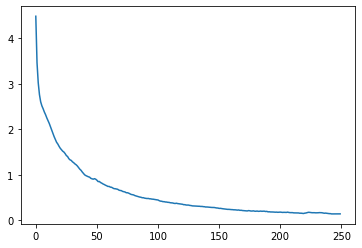

In [104]:
# plot losses
plt.plot(clf.history['loss'])

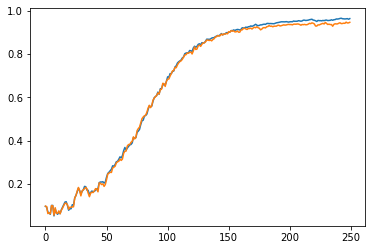

In [105]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

In [106]:
preds = clf.predict_proba(X_test)

In [107]:
y_preds = np.argmax(preds, axis=1)

In [108]:
crop_dict = {0:1, 1:2, 2:3, 3:5, 4:6, 5:8, 6:10, 7:11, 8:12, 9:13, 10:15, 11:16}

In [109]:
def replace_with_dict(ar, dic):
    # Extract out keys and values
    k = np.array(list(dic.keys()))
    v = np.array(list(dic.values()))

    # Get argsort indices
    sidx = k.argsort()

    # Drop the magic bomb with searchsorted to get the corresponding
    # places for a in keys (using sorter since a is not necessarily sorted).
    # Then trace it back to original order with indexing into sidx
    # Finally index into values for desired output.
    return v[sidx[np.searchsorted(k,ar,sorter=sidx)]]

In [110]:
y_preds = replace_with_dict(y_preds, crop_dict)

In [111]:
test_acc = accuracy_score(y_pred=y_preds, y_true=y_test)

print(f"BEST VALID SCORE FOR : {clf.best_cost}")
print(f"FINAL TEST SCORE FOR : {test_acc}")

BEST VALID SCORE FOR : 0.9481821980777267
FINAL TEST SCORE FOR : 0.9081588132635253


In [30]:
train.groupby(['crop_id']).count()

,geometry,B02_0322,B03_0322,B04_0322,B05_0322,B06_0322,B07_0322,B08A_0322,B08_0322,B11_0322,...,VH_20180905,VV_20180905,VH_20180913,VV_20180913,VH_20180917,VV_20180917,VH_20180925,VV_20180925,VH_20180929,VV_20180929
crop_id,,,,,,,,,,,,,,,,,,,,,
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
6,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
8,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
10,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
11,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
12,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [26]:
test.groupby(['crop_id']).count()

,geometry,B02_0322,B03_0322,B04_0322,B05_0322,B06_0322,B07_0322,B08A_0322,B08_0322,B11_0322,...,VH_20180905,VV_20180905,VH_20180913,VV_20180913,VH_20180917,VV_20180917,VH_20180925,VV_20180925,VH_20180929,VV_20180929
crop_id,,,,,,,,,,,,,,,,,,,,,
1,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
2,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
3,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
5,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
6,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
8,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
10,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
11,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
12,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400


In [31]:
1200+4584

5784

In [16]:
1/(X_train.shape[1]*X_train.var())

0.004184100418410041

In [14]:
X_train.shape[1]

239